# Week 2 Exercise: Liquid Vapour Equilibria

## Bubble and Dew points

Compute the bubble and dew pressure for a chloroform-methanol mixture at 50$^\circ$ C for all possible molar compositions. 

### Data and useful information

The Equilibrium vapour pressure in bar is given by the following Antoine equation: 

$$
\log_{10}{P^\circ(T)}= A-\frac{B}{T+C} - \log_{10}750
$$

with (chloroform=1, methanol=2): 

$A=[6.95465, 8.08097]$

$B=[1170.966, 1582.271]$

$C=[226.232, 239.726]$


The activity of the components of the mixture (chloroform=1, methanol=2) can be described by the Van Laar model i.e.: 

$$
\ln{\gamma_1}=\frac{A_{12}}{1+\frac{A_{12}x_1}{A_{21}x_2}}
$$


$$
\ln{\gamma_2}=\frac{A_{21}}{1+\frac{A_{21}x_2}{A_{12}x_1}}
$$

with $A_{12}=0.9726$ and $A_{21}=1.9210$.

### Problem definitions: 

When computing the __Bubble__ pressure, we are estimating the pressure (and the composition) of the very first bubble of vapour formed in a liquid at known composition ($\mathbf{x}$ is known). 
The equations we can use to solve the problem are the equilibrium statements N-1 species in the system (i.e. the Raoult equation in the case of an ideal mixture of ideal gases) and the stoichiometric constraint on the composition of the __vapour__ phase. 

When computing the __Dew__ pressure, we are estimating the pressure (and the composition) of the very first droplet of liquid formed in a vapour at known composition ($\mathbf{y}$ is known). 
The equations we can use to solve the problem are the equilibrium statements N-1 species in the system (i.e. the Raoult equation in the case of an ideal mixture of ideal gases) and the stoichiometric constraint on the composition of the __liquid__ phase. 



In [1]:
from IPython.display import HTML
HTML('VLequilibrium_interactive.html')

### Example solution: Bubble points

/var/folders/4v/jxb311rn5nq2q59y91zzgxd40000gp/T/ipykernel_21294/1319050876.py:18: RuntimeWarning: divide by zero encountered in divide
  gamma1=np.exp(VLA12/(1+VLA12*x/(VLA21*(1-x))))
/var/folders/4v/jxb311rn5nq2q59y91zzgxd40000gp/T/ipykernel_21294/1319050876.py:19: RuntimeWarning: divide by zero encountered in divide
  gamma2=np.exp(VLA21/(1+VLA21*(1-x)/(VLA12*(x))))


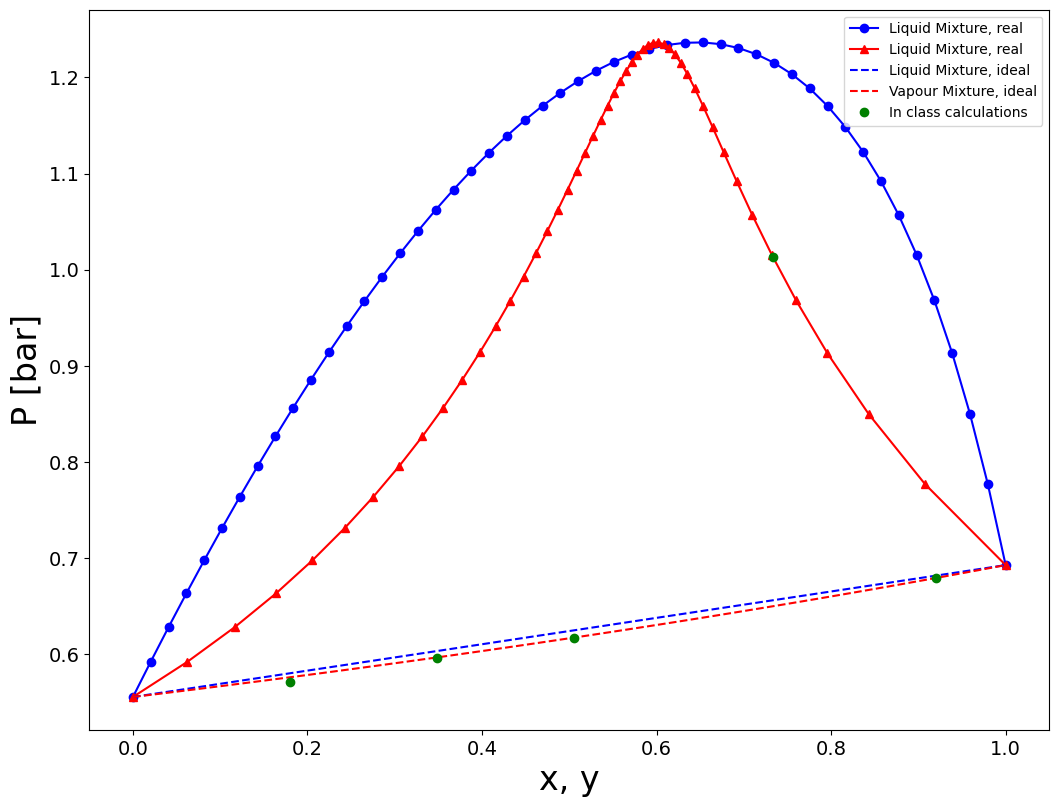

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

T=[50]
x=np.linspace(0,1,50)

AA=np.array([6.95465, 8.08097])
AB=np.array([1170.966, 1582.271])
AC=np.array([226.232, 239.726])

VLA12=0.9726
VLA21=1.9210

xinclass=np.array([0.15, 0.3, 0.45,  0.9, 0.9])
yinclass=np.array([0.18, 0.349, 0.505,  0.92, 0.734])
Pinclass=np.array([0.571, 0.596, 0.617, 0.679, 1.013])

gamma1=np.exp(VLA12/(1+VLA12*x/(VLA21*(1-x))))
gamma2=np.exp(VLA21/(1+VLA21*(1-x)/(VLA12*(x))))

Peq=(10**((AA-AB/(T+AC))))/750 #bar

Pbubble=Peq[0]*x*gamma1+Peq[1]*(1-x)*gamma2
K1=(Peq[0]*gamma1)/Pbubble
K2=(Peq[1]*gamma2)/Pbubble
ybubble=K1*x

Pbubble_ideal=Peq[0]*x+Peq[1]*(1-x)

ybubble_ideal=Peq[0]/Pbubble_ideal*x

figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.5,1.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

axes.plot(x,Pbubble,'b-o',label='Liquid Mixture, real')
axes.plot(ybubble,Pbubble,'r-^',label='Vapour Mixture, real')


axes.plot(x,Pbubble_ideal,'b--', label='Liquid Mixture, ideal')
axes.plot(ybubble_ideal,Pbubble_ideal,'r--',label='Vapour Mixture, ideal')

axes.plot(yinclass,Pinclass,'go',label='In class calculations')

axes.set_xlabel('x, y', fontsize=24);
axes.set_ylabel('P [bar]',fontsize=24); 

axes.legend();
